# 1. LR (Régression Logistique)
La régression logistique est une méthode statistique utilisée pour la classification binaire. Elle modélise la probabilité d'un événement en fonction des variables d'entrée à l'aide de la fonction sigmoïde.

# 2. SVM Linéaire
Le **SVM linéaire** (Support Vector Machine) est un algorithme de classification qui sépare les classes par une frontière linéaire optimale. Il cherche à maximiser la marge entre les différentes classes.

# 3. SVM Poly (SVM avec noyau polynomial)
Le **SVM polynomial** utilise un noyau polynomial pour transformer les données dans un espace de dimension plus élevée, ce qui permet de créer des frontières de séparation non linéaires entre les classes.

# 4. SVM RBF (SVM avec noyau Radial Basis Function)
Le **noyau RBF** est utilisé pour transformer les données en un espace de plus grande dimension, permettant ainsi de séparer les classes de manière non linéaire. Il est souvent utilisé lorsque les relations entre les classes sont complexes.

# 5. SVM Sigmoid
Le **noyau sigmoïde** applique une fonction sigmoïde pour transformer les données, créant des frontières de séparation non linéaires. Il est similaire au réseau de neurones à une couche cachée.

# 6. KPPV (K-Plus Proches Voisins)
Le **KPPV** est un algorithme de classification non paramétrique qui classe un échantillon en fonction des labels de ses k voisins les plus proches. La distance entre les échantillons peut être mesurée selon différentes métriques (Euclidienne, Manhattan, etc.).


# Librairies nécessaires

In [45]:
import numpy as np # importer la bibliothèque numpy pour manipuler des tableaux multidimensionnels

import pandas as pd # importer la bibliothèque pandas pour manipuler et analyser des données sous forme de tables

import matplotlib.pyplot as plt # importer la bibliothèque matplotlib pour  tracer des graphiques et visualiser des données

from sklearn.model_selection import train_test_split # importer train_test_split pour diviser un jeu de données en ensemble d'entraînement et de test

from sklearn.preprocessing import StandardScaler # importer StandardScaler pour normaliser les données en les mettant à la même échelle (centrées-réduites).

from sklearn.inspection import DecisionBoundaryDisplay # importer DecisionBoundaryDisplay pour afficher les frontières de décision des modèles de classification

from sklearn.linear_model import LogisticRegression # importer LogisticRegression pour implémenter la régression logistique, un algorithme de classification

from sklearn.neighbors import KNeighborsClassifier # importer KNeighborsClassifier pour implémenter l'algorithme des k plus proches voisins (KNN) pour la classification.

from sklearn.svm import SVC, LinearSVC # importer SVC et LinearSVC pour la classification avec des machines à vecteurs de support (SVM).

from sklearn.metrics import accuracy_score # importer accuracy_score pour calculer la précision du modèle (nombre de prédictions correctes / nombre total).

from sklearn.metrics import classification_report # importer classification_report pour fournir un rapport détaillé des performances d’un modèle (précision, rappel, F1-score...).

from sklearn.metrics import confusion_matrix # importer confusion_matrix pour génèrer une matrice de confusion qui permet d’analyser les erreurs de classification.

from sklearn.datasets import load_breast_cancer # load_breast_cancer pour charger un jeu de données médical sur le cancer du sein.

# Jeux de données

In [46]:
from sklearn.datasets import load_breast_cancer ## Importer le jeu de données du cancer du sein depuis scikit-learn
dataset = load_breast_cancer() # Charger le jeu de données dans la variable dataset

# Séparation des caractéristiques (X) et des étiquettes (y)
X = dataset.data  # Matrice des features (caractéristiques des tumeurs)
y = dataset.target  # Vecteur des labels (0 = malin, 1 = bénin)

# Importation du standardiseur pour normaliser les données
scaler = StandardScaler()  # Création d'un objet StandardScaler
# Normalisation des caractéristiques : transformation pour avoir une moyenne de 0 et un écart-type de 1
X_scaled = scaler.fit_transform(X)

# Division du dataset en données d'entraînement (80%) et de test (20%)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# La régression logistique est souvent utilisée pour la classification et l'analyse prédictive. Elle estime la probabilité qu'un événement se produise (ex. voter ou ne pas voter, sur la base d'un ensemble de données donné de variables indépendantes).
* Pour un probleme de classfication binaire (deux classes: $C_1$ et $C_2$), le résultat de la prédiction est une probabilité (la variable dépendante est bornée entre 0 et 1).  Si la probabilité estimée est supérieure ou égale à 0.5, alors le modèle prédit que l'instance appartient à $C_1$, et sinon, elle appartient à $C_2$.

*   Pour implémenter la régression logistique, on aura besoin d'une fonction d'hypothèse $h_\theta(x)$ qui est la sigmoide. Cette fonction permet de retourner une valeur comprise entre 0 et 1:
$$
p(C_1|x) = \frac{1}{1 + e^{ \textbf{w}^Tx}}
$$

SigmoidFunction_701.svg

*   Pour la fonction objective, il est recommande d'utiliser une fonction convexe comme la fonction logarithmique suivante:

$$
J(\textbf{w}) =-\frac{1}{m}\sum_{i=1}^{n}y^{(i)}\log(p(C_1|x^{(i)}))+(1-y^{(i)})\log(1-p(C_1|x^{(i)}))
$$

# 1. Régression Logistique

In [47]:
class myLogistic_Regression:
    # Initialisation du modèle avec les paramètres de base
    def __init__(self, lr=0.001, epochs=1000, batch_size=32, optimizer='sgd'):
        self.lr = lr
        self.epochs = epochs
        self.batch_size = batch_size
        self.optimizer = optimizer
        self.W = None  # Poids du modèle, initialisé à None.
        self.biais = None  # Biais du modèle, initialisé à None.

    def sigmoid_function(self, Z):
        return 1 / (1 + np.exp(-Z))

    def initialize_parameters(self, features):
        self.W = np.random.randn(features) * 0.01  # Initialisation des poids avec des petites valeurs aléatoires.
        self.biais = 0  # Initialisation du biais à zéro.

    def compute_cost(self, A, Y_train):
        m = len(Y_train)  # Nombre d'exemples dans le jeu d'entraînement
        # Calcul de la perte (log loss)
        loss = - (np.dot(Y_train, np.log(A)) + np.dot(1 - Y_train, np.log(1 - A))) / m
        return np.squeeze(loss)  # On supprime les dimensions supplémentaires.

    def update_parameters_sgd(self, X_batch, Y_batch, A):
        m = len(Y_batch)  # Nombre d'exemples dans le mini-lot
        # Calcul des gradients de la fonction de coût par rapport aux poids et au biais
        d_W = (1 / m) * np.dot(X_batch.T, (A - Y_batch))  # Gradient des poids
        d_biais = (1 / m) * np.sum(A - Y_batch)  # Gradient du biais

        # Mise à jour des poids et du biais en utilisant la règle de descente de gradient
        self.W -= self.lr * d_W  # Mise à jour des poids
        self.biais -= self.lr * d_biais  # Mise à jour du biais

    def training(self, X_train, Y_train):
        samples, features = X_train.shape  # Nombre d'exemples et de caractéristiques
        self.initialize_parameters(features)  # Initialisation des paramètres (poids et biais)

        for epoch in range(self.epochs):  # Pour chaque époque
            # Mélange des données pour assurer l'aléatoire dans les mini-lots
            permutation = np.random.permutation(samples)
            X_train_shuffled = X_train[permutation]
            Y_train_shuffled = Y_train[permutation]

            epoch_loss = 0  # Initialisation de la perte pour cette époque

            # Entraînement par mini-lots
            for start in range(0, samples, self.batch_size):
                end = min(start + self.batch_size, samples)
                X_batch = X_train_shuffled[start:end]  # Mini-lot des données d'entrée
                Y_batch = Y_train_shuffled[start:end]  # Mini-lot des étiquettes correspondantes

                # Calcul de la sortie linéaire et des probabilités
                Z = np.dot(X_batch, self.W) + self.biais
                A = self.sigmoid_function(Z)

                # Calcul de la perte pour ce mini-lot
                epoch_loss += self.compute_cost(A, Y_batch)

                # Mise à jour des paramètres (poids et biais)
                self.update_parameters_sgd(X_batch, Y_batch, A)

            # Affichage de la perte moyenne de cette époque
            print(f"Epoch {epoch + 1}/{self.epochs}, Loss: {epoch_loss / (samples // self.batch_size)}")

    def model_prediction(self, X_test, threshold=0.5):
        Z = np.dot(X_test, self.W) + self.biais  # Calcul de la sortie linéaire
        A = self.sigmoid_function(Z)  # Calcul des probabilités
        # Prédiction des classes en fonction du seuil
        y_pred = [1 if i > threshold else 0 for i in A]
        return np.array(y_pred)  # Renvoi des prédictions sous forme d'un tableau numpy

def accuracy(label, y_pred):
    return np.sum(label == y_pred) / len(label)  # Calcul de la précision comme le ratio des prédictions correctes


In [48]:
# Initialisation du modèle de régression logistique
log_reg = myLogistic_Regression(lr=0.001, epochs=1000, batch_size=32)

# Entraînement du modèle
log_reg.training(X_train, Y_train)

# Prédiction sur le jeu de test
y_pred = log_reg.model_prediction(X_test)

# Affichage de l'accuracy
print("Accuracy on test set:", accuracy(Y_test, y_pred))

Epoch 1/1000, Loss: 0.7368986767159642
Epoch 2/1000, Loss: 0.7070736088926713
Epoch 3/1000, Loss: 0.6784221309851806
Epoch 4/1000, Loss: 0.6529948718629094
Epoch 5/1000, Loss: 0.636774369769352
Epoch 6/1000, Loss: 0.6131068136175818
Epoch 7/1000, Loss: 0.5949306746753693
Epoch 8/1000, Loss: 0.57757235702095
Epoch 9/1000, Loss: 0.5619655685191257
Epoch 10/1000, Loss: 0.5448571814992602
Epoch 11/1000, Loss: 0.5346005280897403
Epoch 12/1000, Loss: 0.5135416172959781
Epoch 13/1000, Loss: 0.5111860168575924
Epoch 14/1000, Loss: 0.4953084117615106
Epoch 15/1000, Loss: 0.4881576804517825
Epoch 16/1000, Loss: 0.4735913210958665
Epoch 17/1000, Loss: 0.4679455245013227
Epoch 18/1000, Loss: 0.460384381441589
Epoch 19/1000, Loss: 0.44632281164048754
Epoch 20/1000, Loss: 0.43893219227849195
Epoch 21/1000, Loss: 0.42944544301162507
Epoch 22/1000, Loss: 0.4246374505808416
Epoch 23/1000, Loss: 0.41806273315246933
Epoch 24/1000, Loss: 0.40434120596971906
Epoch 25/1000, Loss: 0.3951446402892103
Epoch 26

Epoch 1/1000, Loss: 0.7375720569890969
Epoch 2/1000, Loss: 0.7344263331269991
Epoch 3/1000, Loss: 0.7318533116341691
Epoch 4/1000, Loss: 0.7292234635507125
Epoch 5/1000, Loss: 0.7262262523960358
Epoch 6/1000, Loss: 0.7231630080035406
Epoch 7/1000, Loss: 0.719953505676753
Epoch 8/1000, Loss: 0.7191131086989502
Epoch 9/1000, Loss: 0.7156759197070865
Epoch 10/1000, Loss: 0.7137473983775334
Epoch 11/1000, Loss: 0.711324407785369
Epoch 12/1000, Loss: 0.7074873967768356
Epoch 13/1000, Loss: 0.7052008648641636
Epoch 14/1000, Loss: 0.7041758968792191
Epoch 15/1000, Loss: 0.6995718980812156
Epoch 16/1000, Loss: 0.6983697071890685
Epoch 17/1000, Loss: 0.6958786282357637
Epoch 18/1000, Loss: 0.6939525492900204
Epoch 19/1000, Loss: 0.690357225795908
Epoch 20/1000, Loss: 0.6887807420610738
Epoch 21/1000, Loss: 0.6872051825042501
Epoch 22/1000, Loss: 0.6845768269877887
Epoch 23/1000, Loss: 0.6819182011247096
Epoch 24/1000, Loss: 0.6781968716362684
Epoch 25/1000, Loss: 0.6754261405455132
Epoch 26/100

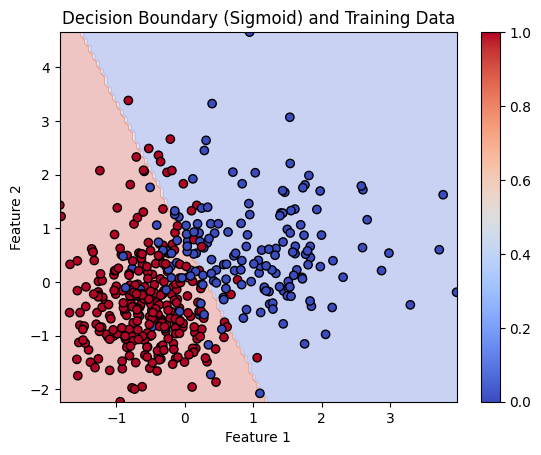

In [49]:
# Visualisation de la frontière décisionnelle avec une courbure sigmoïde
X_train_2d = X_train[:, :2]  # Extraction des deux premières caractéristiques pour la visualisation
log_reg_2d = myLogistic_Regression(lr=0.001, epochs=1000, batch_size=32)
log_reg_2d.training(X_train_2d, Y_train)
# Création d'une grille pour visualiser la frontière décisionnelle
xx, yy = np.meshgrid(np.linspace(X_train_2d[:, 0].min(), X_train_2d[:, 0].max(), 100),
                     np.linspace(X_train_2d[:, 1].min(), X_train_2d[:, 1].max(), 100))

# Prédiction sur la grille pour obtenir la probabilité
grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_probabilities = log_reg_2d.sigmoid_function(np.dot(grid_points, log_reg_2d.W) + log_reg_2d.biais)

# La frontière est où la probabilité est égale à 0.5
grid_predictions = [1 if i > 0.5 else 0 for i in grid_probabilities]

# Affichage de la frontière
plt.contourf(xx, yy, np.array(grid_predictions).reshape(xx.shape), alpha=0.3, cmap='coolwarm')
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=Y_train, edgecolors='k', marker='o', label='Training data', cmap='coolwarm')
plt.title('Decision Boundary (Sigmoid) and Training Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()

In [50]:
# Utilisation de SKLEARN

model_lr = LogisticRegression()
model_lr.fit(X_train, Y_train)
y_pred_lr = model_lr.predict(X_test)
print(classification_report(Y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



# 2. Support Vector Machine (SVM)

Les machines à vecteurs de support (SVM) sont un puissant algorithme d'apprentissage supervisé utilisé pour la classification ou la régression.

SVM a pour but de minimiser l'erreur et de maximiser la marge
$ \frac{2}{||w||} $.

Les droites sont décrites par les équations suivantes :



*  La frontière de décision : $ w \cdot x^{(i)} - b = 0 $

*   si $ y^{(i)} = 1 $ (classe positive): $ w  \cdot x^{(i)} - b \geq  1 $

*   si $ y^{(i)} = -1 $ (classe negative): $ w  \cdot x^{(i)} - b \leq  -1 $

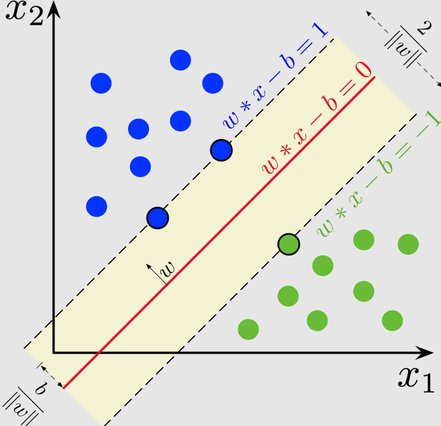

## SVM avec noyau linear

In [51]:
# Création du classifieur SVM avec un noyau linéaire
SVM_classifier = SVC(kernel = 'linear', random_state = 0)

# Entraînement du modèle SVM sur les données d'entraînement (X_train, Y_train)
SVM_model = SVM_classifier.fit(X_train, Y_train)

# Prédiction des classes sur les données de test (X_test)
SVM_pred = SVM_model.predict(X_test)

# Calcul de l'accuracy (précision) du modèle en comparant les prédictions avec les vraies étiquettes
model_accuracy = accuracy(Y_test, SVM_pred )

# Affichage de l'accuracy du modèle SVM avec une précision de 2 chiffres après la virgule
print("Accuracy du model SVM de SKlearn est: ", np.round(model_accuracy, 2), '%')


Accuracy du model SVM de SKlearn est:  0.96 %


## SVM avec noyau poly

In [52]:
# Création du modèle SVM avec noyau polynomial
model_svm_poly = SVC(kernel='poly')

# Entraînement du modèle SVM avec noyau polynomial sur les données d'entraînement (X_train, Y_train)
model_svm_poly.fit(X_train, Y_train)

# Prédiction des classes sur les données de test (X_test)
y_pred_svm_poly = model_svm_poly.predict(X_test)

# Affichage des résultats du modèle SVM avec noyau polynomial
print('Résultats pour SVM avec noyau poly:')
# Affichage du rapport de classification (précision, rappel, F1-score)
print(classification_report(Y_test, y_pred_svm_poly))


Résultats pour SVM avec noyau poly:
              precision    recall  f1-score   support

           0       1.00      0.65      0.79        43
           1       0.83      1.00      0.90        71

    accuracy                           0.87       114
   macro avg       0.91      0.83      0.85       114
weighted avg       0.89      0.87      0.86       114



## SVM avec noyau rbf

In [53]:
# Création du modèle SVM avec noyau RBF (Radial Basis Function)
model_svm_rbf = SVC(kernel='rbf')

# Entraînement du modèle SVM avec noyau RBF sur les données d'entraînement (X_train, Y_train)
model_svm_rbf.fit(X_train, Y_train)

# Prédiction des classes sur les données de test (X_test)
y_pred_svm_rbf = model_svm_rbf.predict(X_test)

# Affichage des résultats du modèle SVM avec noyau RBF
print('Résultats pour SVM avec noyau rbf:')
# Affichage du rapport de classification (précision, rappel, F1-score)
print(classification_report(Y_test, y_pred_svm_rbf))


Résultats pour SVM avec noyau rbf:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



## SVM avec noyau sigmoid

In [54]:
# Création du modèle SVM avec noyau Sigmoid
model_svm_sigmoid = SVC(kernel='sigmoid')

# Entraînement du modèle SVM avec noyau Sigmoid sur les données d'entraînement (X_train, Y_train)
model_svm_sigmoid.fit(X_train, Y_train)

# Prédiction des classes sur les données de test (X_test)
y_pred_svm_sigmoid = model_svm_sigmoid.predict(X_test)

# Affichage des résultats du modèle SVM avec noyau Sigmoid
print('Résultats pour SVM avec noyau sigmoid:')
# Affichage du rapport de classification (précision, rappel, F1-score)
print(classification_report(Y_test, y_pred_svm_sigmoid))


Résultats pour SVM avec noyau sigmoid:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



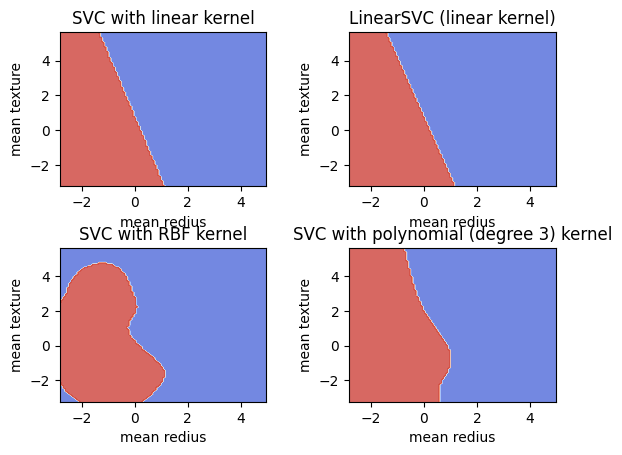

In [55]:
# Création de différents modèles SVM avec différents noyaux
models = (
    SVC(kernel="linear", C=1.0),  # SVM avec noyau linéaire
    LinearSVC(C=1.0, max_iter=10000),  # SVM linéaire avec une implémentation différente
    SVC(kernel="rbf", gamma=0.7, C=1.0),  # SVM avec noyau RBF (Radial Basis Function)
    SVC(kernel="poly", degree=3, gamma="auto", C=1.0),  # SVM avec noyau polynomial (degré 3)
)

# Entraînement de chaque modèle sur les données d'entraînement
models = (clf.fit(X_train_2d, Y_train) for clf in models)

# Définition des titres pour chaque sous-graphique
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Mise en place d'un graphique 2x2 pour afficher les frontières de décision
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Séparation des caractéristiques X_train_2d en deux variables
X0, X1 = X_train_2d[:, 0], X_train_2d[:, 1]

# Affichage des frontières de décision pour chaque modèle sur la grille
for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,  # Modèle SVM
        X_train_2d,  # Données d'entraînement
        response_method="predict",  # Méthode de prédiction pour générer la frontière
        cmap=plt.cm.coolwarm,  # Couleurs pour la frontière de décision
        alpha=0.8,  # Transparence de la frontière
        ax=ax,  # Axe pour afficher chaque sous-graphique
        xlabel='mean redius',  # Légende de l'axe x
        ylabel='mean texture',  # Légende de l'axe y
    )
    ax.set_title(title)  # Ajout du titre au sous-graphique
    # Aff


# 3. k-Plus Proches Voisins (k-NN)

In [26]:
# Création du modèle KNN avec 1 voisin
model_knn = KNeighborsClassifier(n_neighbors=1)

# Entraînement du modèle sur les données d'entraînement
model_knn.fit(X_train, Y_train)

# Prédiction des étiquettes sur les données de test
y_pred_knn = model_knn.predict(X_test)

# Affichage du rapport de classification pour évaluer les performances du modèle
print(classification_report(Y_test, y_pred_knn))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        25
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        29

    accuracy                           1.00       161
   macro avg       1.00      1.00      1.00       161
weighted avg       1.00      1.00      1.00       161



In [14]:
# Création du modèle KNN avec 3 voisins
model_knn = KNeighborsClassifier(n_neighbors=3)

# Entraînement du modèle sur les données d'entraînement
model_knn.fit(X_train, Y_train)

# Prédiction des étiquettes sur les données de test
y_pred_knn = model_knn.predict(X_test)

# Affichage du rapport de classification pour évaluer les performances du modèle
print(classification_report(Y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [15]:
# Création du modèle KNN avec 5 voisins
model_knn = KNeighborsClassifier(n_neighbors=5)

# Entraînement du modèle sur les données d'entraînement
model_knn.fit(X_train, Y_train)

# Prédiction des étiquettes sur les données de test
y_pred_knn = model_knn.predict(X_test)

# Affichage du rapport de classification pour évaluer les performances du modèle
print(classification_report(Y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



**Tâche à réaliser : Classification KPPV, SVM-RBF, SVM-Lineaire, SVM-Sigmoid en utilisant les librairies sk-learn**

**Contexte :**
**Dans cette tâche, vous utiliserez un jeu de données appelé gene_expression_cancer (disponible sur Moodle). L'objectif de cette activité est d'appliquer plusieurs méthodes de classification pour prédire les catégories de cancer à partir des données d'expression génétique. Vous devrez appliquer les modèles de K-Nearest Neighbors (KNN), Support Vector Machines (SVM) avec les noyaux RBF, Linéraire et Sigmoid.**

## <div class="alert alert-block alert-info">Vous devez retourner ce notebook avec les commentaires sur l'ensemble du code y compris la partie faite durant la séance de l'atelier !</div>

In [16]:
from sklearn.preprocessing import LabelEncoder # importer LabelEncoder pour convertir les données catégorielles en numerique

**Chargement des jeux de données**

**1.   Le chargement des jeux de données des caractéristiques**

In [17]:
data = pd.read_csv("/content/drive/MyDrive/Atelier 3/TCGA-PANCAN-HiSeq-801x20531/data.csv")
data= data.drop(data.columns[0], axis=1)


**2.   Le chargement des jeux de données de la variable cible**

In [18]:
labels = pd.read_csv("/content/drive/MyDrive/Atelier 3/TCGA-PANCAN-HiSeq-801x20531/labels.csv")
labels= labels.drop(labels.columns[0], axis=1)

**Encodage de la variable categorique labels**

In [19]:
label_encoder = LabelEncoder() # objet de labelEncoder
labels["class_Label"] = label_encoder.fit_transform(labels["Class"]) # transforme les valeurs de Sexe par label_encoder

**Normalisation et division du Dataset en Data train et test**

In [27]:
scaler = StandardScaler() # Création d'un objet StandardScaler

# Normalisation des caractéristiques : transformation pour avoir une moyenne de 0 et un écart-type de 1
data_scaled = scaler.fit_transform(data)

# Division du dataset en données d'entraînement (80%) et de test (20%)
X1_train, X1_test, Y1_train, Y1_test = train_test_split(data_scaled, labels["class_Label"], test_size=0.2, random_state=42)


 **les modèles de K-Nearest Neighbors (KNN)**

**1) Création du modèle KNN avec 3 voisins**

In [28]:
# Création du modèle KNN avec 3 voisins
model_knn = KNeighborsClassifier(n_neighbors=3)

# Entraînement du modèle sur les données d'entraînement
model_knn.fit(X1_train, Y1_train)

# Prédiction des étiquettes sur les données de test
y1_pred_knn = model_knn.predict(X1_test)

# Affichage du rapport de classification pour évaluer les performances du modèle
print(classification_report(Y1_test, y1_pred_knn))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        61
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        25
           3       0.97      1.00      0.98        29
           4       1.00      1.00      1.00        29

    accuracy                           0.99       161
   macro avg       0.99      1.00      0.99       161
weighted avg       0.99      0.99      0.99       161



**2) Création du modèle KNN avec 5 voisins**

In [29]:
# Création du modèle KNN avec 5 voisins
model_knn = KNeighborsClassifier(n_neighbors=5)

# Entraînement du modèle sur les données d'entraînement
model_knn.fit(X1_train, Y1_train)

# Prédiction des étiquettes sur les données de test
y1_pred_knn = model_knn.predict(X1_test)

# Affichage du rapport de classification pour évaluer les performances du modèle
print(classification_report(Y1_test, y1_pred_knn))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        61
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        25
           3       0.97      1.00      0.98        29
           4       1.00      1.00      1.00        29

    accuracy                           0.99       161
   macro avg       0.99      1.00      0.99       161
weighted avg       0.99      0.99      0.99       161



**les modèles de Support Vector Machines (SVM) avec les noyaux RBF, Linéraire et Sigmoid.**

**1) le modèle de Support Vector Machines (SVM) avec le noyau Linéraire**

In [30]:
# Création du classifieur SVM avec un noyau linéaire
SVM_classifier = SVC(kernel = 'linear', random_state = 0)

# Entraînement du modèle SVM sur les données d'entraînement (X_train, Y_train)
SVM_model = SVM_classifier.fit(X1_train, Y1_train)

# Prédiction des classes sur les données de test (X_test)
SVM_pred = SVM_model.predict(X1_test)

# Calcul de l'accuracy (précision) du modèle en comparant les prédictions avec les vraies étiquettes
model_accuracy = accuracy(Y1_test, SVM_pred )

# Affichage de l'accuracy du modèle SVM avec une précision de 2 chiffres après la virgule
print("Accuracy du model SVM de SKlearn est: ", np.round(model_accuracy, 2), '%')

Accuracy du model SVM de SKlearn est:  1.0 %


**2) le modèle de Support Vector Machines (SVM) avec le noyau RBF**

In [31]:
# Création du modèle SVM avec noyau RBF (Radial Basis Function)
model_svm_rbf = SVC(kernel='rbf')

# Entraînement du modèle SVM avec noyau RBF sur les données d'entraînement (X_train, Y_train)
model_svm_rbf.fit(X1_train, Y1_train)

# Prédiction des classes sur les données de test (X_test)
y_pred_svm_rbf = model_svm_rbf.predict(X1_test)

# Affichage des résultats du modèle SVM avec noyau RBF
print('Résultats pour SVM avec noyau rbf:')
# Affichage du rapport de classification (précision, rappel, F1-score)
print(classification_report(Y1_test, y_pred_svm_rbf))

Résultats pour SVM avec noyau rbf:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        61
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        25
           3       1.00      1.00      1.00        29
           4       1.00      0.97      0.98        29

    accuracy                           0.99       161
   macro avg       1.00      0.99      0.99       161
weighted avg       0.99      0.99      0.99       161



**3) le modèle de Support Vector Machines (SVM) avec le noyau Signoid**

In [32]:
# Création du modèle SVM avec noyau Sigmoid
model_svm_sigmoid = SVC(kernel='sigmoid')

# Entraînement du modèle SVM avec noyau Sigmoid sur les données d'entraînement (X_train, Y_train)
model_svm_sigmoid.fit(X1_train, Y1_train)

# Prédiction des classes sur les données de test (X_test)
y_pred_svm_sigmoid = model_svm_sigmoid.predict(X1_test)

# Affichage des résultats du modèle SVM avec noyau Sigmoid
print('Résultats pour SVM avec noyau sigmoid:')
# Affichage du rapport de classification (précision, rappel, F1-score)
print(classification_report(Y1_test, y_pred_svm_sigmoid))

Résultats pour SVM avec noyau sigmoid:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        25
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        29

    accuracy                           1.00       161
   macro avg       1.00      1.00      1.00       161
weighted avg       1.00      1.00      1.00       161



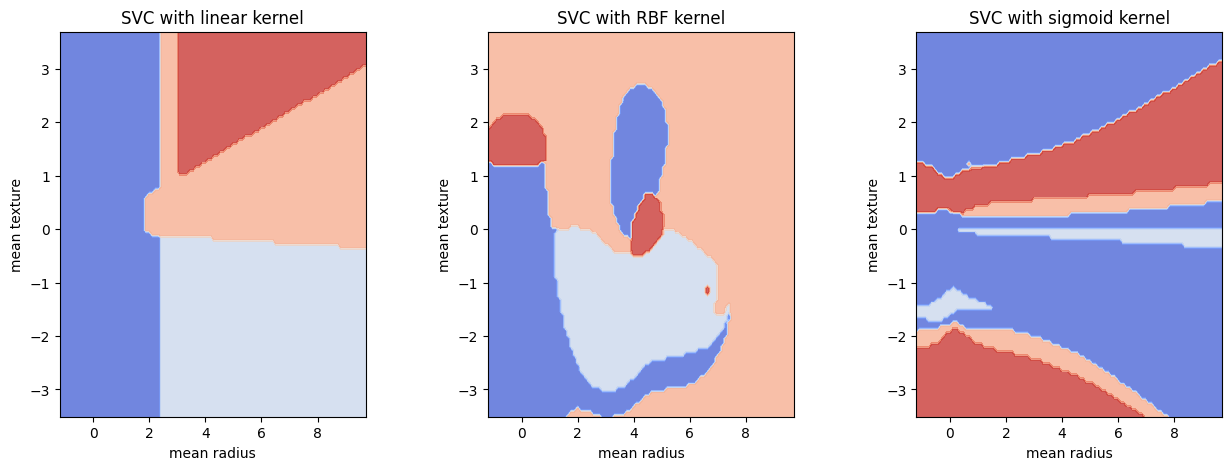

In [58]:
# Création de différents modèles SVM avec différents noyaux
models = (
    SVC(kernel="linear", C=1.0),  # SVM avec noyau linéaire
    SVC(kernel="rbf", gamma=0.7, C=1.0),  # SVM avec noyau RBF (Radial Basis Function)
    SVC(kernel='sigmoid')
)

X1_train_2d = X1_train[:, :2]
# Entraînement de chaque modèle sur les données d'entraînement
models = (clf.fit(X1_train_2d, Y1_train) for clf in models)

# Définition des titres pour chaque sous-graphique
titles = (
    "SVC with linear kernel",
    "SVC with RBF kernel",
    "SVC with sigmoid kernel"
)

# Mise en place d'un graphique 1x3 pour afficher les frontières de décision
fig, sub = plt.subplots(1, 3, figsize=(15, 5))  # Ajustement de la taille du graphique
plt.subplots_adjust(wspace=0.4, hspace=0.4)  # Ajustement de l'espacement

# Séparation des caractéristiques X_train_2d en deux variables
X0, X1 = X1_train_2d[:, 0], X1_train_2d[:, 1]

# Affichage des frontières de décision pour chaque modèle sur la grille
for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,  # Modèle SVM
        X1_train_2d,  # Données d'entraînement
        response_method="predict",  # Méthode de prédiction pour générer la frontière
        cmap=plt.cm.coolwarm,  # Couleurs pour la frontière de décision
        alpha=0.8,  # Transparence de la frontière
        ax=ax,  # Axe pour afficher chaque sous-graphique
        xlabel='mean radius',  # Correction du libellé de l'axe x
        ylabel='mean texture',  # Légende de l'axe y
    )
    ax.set_title(title)  # Ajout du titre au sous-graphique